## Аналитика в Яндекс.Афише

# Содержание проекта:


* [Задание 1. Подготовка данных.](#read_data)  
* [Задание 2. Продукт.](#analyst)
* [Задание 3. Продажи.](#prodaja)
* [Задание 4. Маркетинг.](#marketing)
* [Вывод.](#final)






<div class="alert alert-block alert-success"> 

## Задание 1. Подготовка данных.<a class="anchor" id="read_data"></a> 
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
visits_log = pd.read_csv('/datasets/visits_log.csv')
orders_log = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358532 entries, 0 to 358531
Data columns (total 5 columns):
Uid          358532 non-null uint64
Device       358532 non-null object
End Ts       358532 non-null object
Source Id    358532 non-null int64
Start Ts     358532 non-null object
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Пропусков данных в наших таблицах не обнаружено! Знакомимся дальше.

In [6]:
visits_log.head()

,Uid,Device,End Ts,Source Id,Start Ts
0,16879256277535980062,touch,20.12.2017 17:38,4,20.12.2017 17:20
1,104060357244891740,desktop,19.02.2018 17:21,2,19.02.2018 16:53
2,7459035603376831527,touch,01.07.2017 1:54,5,01.07.2017 1:54
3,16174680259334210214,desktop,20.05.2018 11:23,9,20.05.2018 10:59
4,9969694820036681168,desktop,27.12.2017 14:06,3,27.12.2017 14:06


In [7]:
orders_log.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Переведем все названия столбцов в нижний регистр. А так же переименуем их.

In [9]:
print(visits_log.columns)

Index(['Uid', 'Device', 'End Ts', 'Source Id', 'Start Ts'], dtype='object')


In [10]:
print(orders_log.columns)

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')


In [11]:
visits_log.columns = ['uid', 'device', 'end_ts', 'source_id', 'start_ts']
orders_log.columns = ['buy_ts', 'revenue', 'uid']

In [12]:
visits_log.head()

,uid,device,end_ts,source_id,start_ts
0,16879256277535980062,touch,20.12.2017 17:38,4,20.12.2017 17:20
1,104060357244891740,desktop,19.02.2018 17:21,2,19.02.2018 16:53
2,7459035603376831527,touch,01.07.2017 1:54,5,01.07.2017 1:54
3,16174680259334210214,desktop,20.05.2018 11:23,9,20.05.2018 10:59
4,9969694820036681168,desktop,27.12.2017 14:06,3,27.12.2017 14:06


In [13]:
orders_log.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Теперь все столбцы написаны нижним регистром.

Я заметил, что в таблице visits_log, формат даты не соотвествует формату даты остальных, поменяем его.

In [14]:
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'], format='%d.%m.%Y %H:%M')

In [15]:
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'],format='%d.%m.%Y %H:%M')

In [16]:
visits_log.head()

,uid,device,end_ts,source_id,start_ts
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00


Так же переведем в формат данных остальных столбцов с датами.

In [17]:
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

-------
<div class="alert alert-block alert-success"> 

## Задание 2. Продукт.<a class="anchor" id="analyst"></a> 
</div>

-----

Шаг 2. Постройте отчеты и посчитайте метрики

Продукт
* Сколько людей пользуются в день, неделю, месяц?.  
* Сколько сессий в день?
* Сколько длится одна сессия?
* Как часто люди возвращаются?
* Вывод.

Для начала поработаем с таблицей visits_log и найдем необходимую информацию.
- Сколько людей пользуются в день, неделю, месяц?
Для этого найдем количество уникальных пользователей в день, в неделю, в месяц

In [18]:
visits_log.head()

,uid,device,end_ts,source_id,start_ts
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00


----
<div>
Сколько людей пользуются в день, неделю, месяц?<a class="anchor" id="1"></a> 
</div>



----

In [19]:
visits_log['start_date'] = visits_log['start_ts'].dt.date
visits_log['start_week'] = visits_log['start_ts'].dt.week
visits_log['start_month'] = visits_log['start_ts'].dt.month
visits_log['start_year'] = visits_log['start_ts'].dt.year

In [20]:
day_used = visits_log.groupby('start_date').agg({'uid': 'nunique'}).mean()
week_used = visits_log.groupby(['start_week','start_year']).agg({'uid': 'nunique'}).mean()
month_used = visits_log.groupby(['start_month','start_year']).agg({'uid': 'nunique'}).mean()

In [21]:
print(f'Уникальных пользователей в день {int(day_used)}')
print(f'Уникальных пользователей в неделю {int(week_used)}')
print(f'Уникальных пользователей в месяц {int(month_used)}')

Уникальных пользователей в день 907
Уникальных пользователей в неделю 5716
Уникальных пользователей в месяц 23228


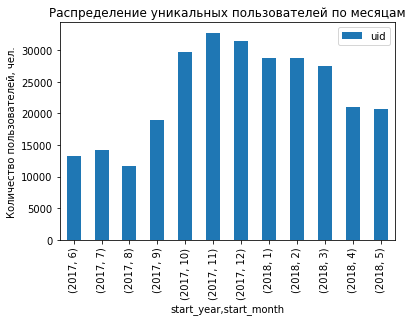

In [22]:
visits_log.groupby(['start_year','start_month']).agg({'uid': 'nunique'}).plot(kind='bar',
title = 'Распределение уникальных пользователей по месяцам')
plt.ylabel('Количество пользователей, чел.', fontsize=10);


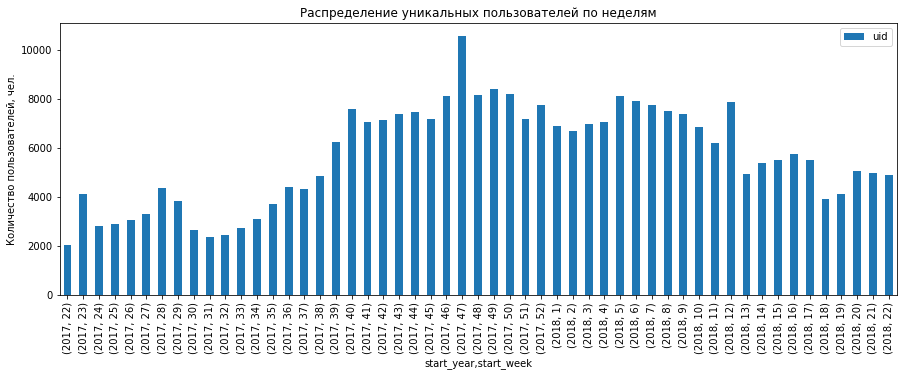

In [23]:
visits_log.groupby(['start_year','start_week']).agg({'uid': 'nunique'}).plot(kind='bar',
title = 'Распределение уникальных пользователей по неделям',figsize=(15,5))
plt.ylabel('Количество пользователей, чел.', fontsize=10);


## Вывод:
По графикам видно, что самые активные месяцы для посещений, это холодные времена года. Это объясняется тем, что на улице из-за погоды люди проводят меньше времени, и ищут разные мероприятия для своего досуга. А летом большинство людей предпочитают прогулки на улице. 

-----
<div>
Сколько сессий в день?<a class="anchor" id="2"></a> 
</div>

-----

Теперь найдем количество посещений сайта и количество уникальных пользователей в день.

In [24]:
sessions_users = visits_log.groupby('start_date').agg({'uid': ['count','nunique']})
sessions_users.columns = ['count','users']

In [25]:
sessions_users.head()

,count,users
start_date,,
2017-06-01,661,605
2017-06-02,653,608
2017-06-03,476,445
2017-06-04,508,476
2017-06-05,887,820


Найдем количество сессий на каждого уникального пользователя, что бы понять возвращаются ли пользователи на наш сайт

In [26]:
sessions_users['sessions'] = sessions_users['count'] / sessions_users['users']
sessions_users.head()

,count,users,sessions
start_date,,,
2017-06-01,661,605,1.092562
2017-06-02,653,608,1.074013
2017-06-03,476,445,1.069663
2017-06-04,508,476,1.067227
2017-06-05,887,820,1.081707


In [27]:
sessions_users['sessions'].median()

1.0791978353192322

Видим, что среднее количество сессий на каждого уникального пользователя больше 1, это говорит нам о том, что пользователи возращаются на наш сайт.

*Сколько длится одна сессия?*


Найдем длительность сессий и переведём в минуты.

In [28]:
visits_log['long_ts'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds / 60


In [29]:
visits_log.head()

,uid,device,end_ts,source_id,start_ts,start_date,start_week,start_month,start_year,long_ts
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20,51,12,2017,18.0
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19,8,2,2018,28.0
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,2017-07-01,26,7,2017,0.0
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2018-05-20,20,5,2018,24.0
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,2017-12-27,52,12,2017,0.0


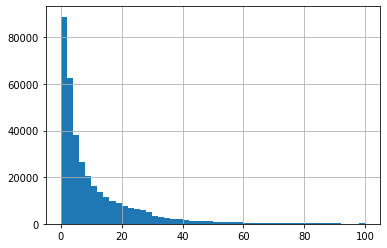

In [30]:
visits_log['long_ts'].hist(bins = 50, range = (0,100));

In [31]:
visits_log['long_ts'].mode()

0    1.0
dtype: float64

In [32]:
visits_log['long_ts'].median()

5.0

In [33]:
visits_log['long_ts'].mean()

10.750306806644874

У нас распределение не нормальное, поэтому будем использовать моду. Мода равняется 1. Значит в среднем продолжительность сессии занимает 1 минуту.

*Как часто люди возвращаются?*

Найдем количество сессия каждого пользователя.

In [34]:
first_visit_date = visits_log.pivot_table(index=('uid','start_ts'))

In [35]:
first_visit_date.head(10)

long_ts  source_id  start_month  \
uid             start_ts                                               
11863502262781  2018-03-01 17:27:00      6.0          3            3   
49537067089222  2018-02-06 15:55:00      2.0          2            2   
297729379853735 2017-06-07 18:47:00      1.0          3            6   
313578113262317 2017-09-18 22:49:00     18.0          2            9   
                2018-02-18 15:17:00      9.0          2            2   
                2018-03-11 17:23:00      6.0          2            3   
325320750514679 2017-09-30 14:29:00      9.0          5            9   
                2018-02-26 12:33:00      1.0          5            2   
397399764396656 2018-01-18 12:32:00      1.0          4            1   
407573351275847 2017-06-17 13:40:00      5.0          2            6   

                                     start_week  start_year  
uid             start_ts                                     
11863502262781  2018-03-01 17:27:00           9        2018  
49537067089222  2018-02-06 15:55:00           6        2018  
297729379853735 2017-06-07 18:47:00          23        2017  
313578113262317 2017-09-18 22:49:00          38        2017  
                2018-02-18 15:17:00           7        2018  
                2018-03-11 17:23:00          10        2018  
325320750514679 2017-09-30 14:29:00          39        2017  
                2018-02-26 12:33:00           9        2018  
397399764396656 2018-01-18 12:32:00           3        2018  
407573351275847 2017-06-17 13:40:00          24        2017

In [36]:
first_visit_date = first_visit_date.reset_index()

In [37]:
first_visit_date.head(10)

,uid,start_ts,long_ts,source_id,start_month,start_week,start_year
0,11863502262781,2018-03-01 17:27:00,6.0,3,3,9,2018
1,49537067089222,2018-02-06 15:55:00,2.0,2,2,6,2018
2,297729379853735,2017-06-07 18:47:00,1.0,3,6,23,2017
3,313578113262317,2017-09-18 22:49:00,18.0,2,9,38,2017
4,313578113262317,2018-02-18 15:17:00,9.0,2,2,7,2018
5,313578113262317,2018-03-11 17:23:00,6.0,2,3,10,2018
6,325320750514679,2017-09-30 14:29:00,9.0,5,9,39,2017
7,325320750514679,2018-02-26 12:33:00,1.0,5,2,9,2018
8,397399764396656,2018-01-18 12:32:00,1.0,4,1,3,2018
9,407573351275847,2017-06-17 13:40:00,5.0,2,6,24,2017


In [38]:
first_visit_date['uid'].value_counts()

12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
4103526784471735383     321
9019681082555518724     314
13551952738594011920    309
10403169074343195591    303
11616947936617491261    302
13216107653026783144    297
14435995954877181653    293
15273714129857295034    277
11920452646463905188    275
16895737306928828916    270
6853820180456171909     255
3706363184142281337     253
3644482766749211722     249
13405147649137020210    228
18027222598828835800    215
12780042542370479493    213
9052738053484766966     213
10246903932085021612    210
6166747268563050393     209
10534330097262531592    203
4394506233053867282     200
6268225112727843212     199
15087669361906245158    198
9737640335185488211     196
5603453646174104178     192
                       ... 
355940701832912068        1
8761566756791855247       1
4923323512948977230       1
8505789944049175220       1
15820713377642453179

У нас встречается пользователь, которые посещали ресурс 893 раза, посмотрим на него.

In [39]:
first_visit_date.query('uid == 12869801667763685675').head(10)

,uid,start_ts,long_ts,source_id,start_month,start_week,start_year
251155,12869801667763685675,2017-06-13 11:17:00,9.0,2,6,24,2017
251156,12869801667763685675,2017-06-13 11:28:00,27.0,5,6,24,2017
251157,12869801667763685675,2017-06-24 10:40:00,20.0,4,6,25,2017
251158,12869801667763685675,2017-06-25 12:27:00,19.0,1,6,25,2017
251159,12869801667763685675,2017-06-27 14:11:00,50.0,5,6,26,2017
251160,12869801667763685675,2017-06-27 15:52:00,2.0,5,6,26,2017
251161,12869801667763685675,2017-06-28 18:21:00,2.0,2,6,26,2017
251162,12869801667763685675,2017-07-12 15:43:00,21.0,2,7,28,2017
251163,12869801667763685675,2017-07-13 13:53:00,6.0,5,7,28,2017
251164,12869801667763685675,2017-07-14 12:38:00,72.0,5,7,28,2017


Найдем среднее значение посещения ресура.

In [40]:
first_visit_date['uid'].value_counts().median()

1.0

По медиане видим, что пользвотали повторно не возвращаются на наш ресурс.

In [41]:
first_visit_date['uid'].value_counts().mean()

1.5713396648975102

Среднее значение показвает, что пользователи всё таки возращаются на ресурс, но мы не можем его использовать так как на этот показатель влияют выбросы данных, это пользователи которые были большое количество раз на ресуре. Попробуем выделить когорты и найти Retention Rate, и построить тепловую карту.

In [42]:
first_visit_date = visits_log.groupby(['uid'])['start_ts'].min()
first_visit_date.name = 'first_visit_date'
visits = visits_log.join(first_visit_date, on='uid')
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

In [43]:
visits

,uid,device,end_ts,source_id,start_ts,start_date,start_week,start_month,start_year,long_ts,first_visit_date,first_visit_month,visit_month
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20,51,12,2017,18.0,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19,8,2,2018,28.0,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,2017-07-01,26,7,2017,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2018-05-20,20,5,2018,24.0,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,2017-12-27,52,12,2017,0.0,2017-12-27 14:06:00,2017-12-01,2017-12-01
5,16007536194108375387,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,2017-09-03,35,9,2017,1.0,2017-09-03 21:35:00,2017-09-01,2017-09-01
6,6661610529277171451,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,2018-01-30,5,1,2018,56.0,2017-06-29 09:00:00,2017-06-01,2018-01-01
7,11423865690854540312,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,2017-11-05,44,11,2017,1.0,2017-11-05 15:14:00,2017-11-01,2017-11-01
8,2987360259350925644,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2017-07-19,29,7,2017,3.0,2017-07-19 10:41:00,2017-07-01,2017-07-01
9,1289240080042562063,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,2017-11-08,45,11,2017,1.0,2017-11-08 13:42:00,2017-11-01,2017-11-01


Мы нашли первый месяц посещения ресурса и последний. Дальше мы найдем разницу между этими данными, которая покажет нам когда пользователи позвращались на ресурс. Так же сократим дату до года и месяца и округлим.

In [44]:
visits['cohort_lifetime'] = (visits['visit_month'] - visits['first_visit_month'])
visits['first_visit_month'] = visits['first_visit_month'].dt.strftime('%Y-%m')
visits['visit_month'] = visits['visit_month'].dt.strftime('%Y-%m')
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')    
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')
visits.head()

,uid,device,end_ts,source_id,start_ts,start_date,start_week,start_month,start_year,long_ts,first_visit_date,first_visit_month,visit_month,cohort_lifetime
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20,51,12,2017,18.0,2017-12-20 17:20:00,2017-12,2017-12,0
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19,8,2,2018,28.0,2018-02-19 16:53:00,2018-02,2018-02,0
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,2017-07-01,26,7,2017,0.0,2017-07-01 01:54:00,2017-07,2017-07,0
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2018-05-20,20,5,2018,24.0,2018-03-09 20:05:00,2018-03,2018-05,2
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,2017-12-27,52,12,2017,0.0,2017-12-27 14:06:00,2017-12,2017-12,0


In [45]:
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [46]:
inital_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
inital_users_count

,first_visit_month,uid
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977
50,2017-11,27248
57,2017-12,25268
63,2018-01,22624
68,2018-02,22197
72,2018-03,20589


In [47]:
inital_users_count = inital_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(inital_users_count,on='first_visit_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

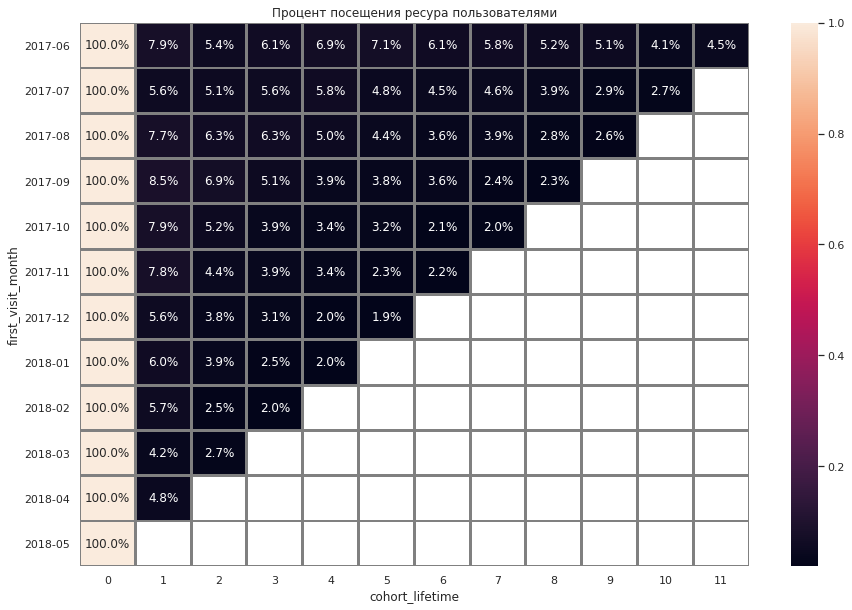

In [48]:
import seaborn as sns

sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('Процент посещения ресура пользователями')

sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=2, linecolor='gray')

plt.show()

На тепловой карте видно, что процент возвращений на ресурс падает с каждым месяцем.


-------
<div class="alert alert-block alert-success"> 

## Задание 3. Продажи.<a class="anchor" id="prodaja"></a> 
</div>

-----



Продажи
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)


Что бы найти когда люди начинают покупать соеденим две таблицы visits_log и order_log по uid, и вычтем из даты первого визита дату первой покупки. 

In [49]:
first_order = orders_log.groupby(['uid'])['buy_ts'].min()

In [50]:
first_order.name = 'first_order'

In [51]:
visits_orders = visits_log.join(first_order, on = 'uid')

In [52]:
visits_orders.head()

,uid,device,end_ts,source_id,start_ts,start_date,start_week,start_month,start_year,long_ts,first_order
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20,51,12,2017,18.0,NaT
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19,8,2,2018,28.0,NaT
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,2017-07-01,26,7,2017,0.0,NaT
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2018-05-20,20,5,2018,24.0,2018-03-09 20:25:00
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,2017-12-27,52,12,2017,0.0,NaT


In [53]:
visits_orders = visits_orders.loc[:, ['uid','first_order','start_ts']]

In [54]:
visits_orders.head()

,uid,first_order,start_ts
0,16879256277535980062,NaT,2017-12-20 17:20:00
1,104060357244891740,NaT,2018-02-19 16:53:00
2,7459035603376831527,NaT,2017-07-01 01:54:00
3,16174680259334210214,2018-03-09 20:25:00,2018-05-20 10:59:00
4,9969694820036681168,NaT,2017-12-27 14:06:00


In [55]:
visits_orders.duplicated().sum()

1

In [56]:
visits_orders = visits_orders.drop_duplicates().reset_index(drop=True)

In [57]:
visits_orders.duplicated().sum()

0

In [58]:
visits_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358531 entries, 0 to 358530
Data columns (total 3 columns):
uid            358531 non-null uint64
first_order    96526 non-null datetime64[ns]
start_ts       358531 non-null datetime64[ns]
dtypes: datetime64[ns](2), uint64(1)
memory usage: 8.2 MB


Теперь найдем через сколько же пользователи делают первую покупку

In [59]:
visits_orders['first'] = visits_orders['first_order'] - visits_orders['start_ts']

In [60]:
visits_orders.head(10)

,uid,first_order,start_ts,first
0,16879256277535980062,NaT,2017-12-20 17:20:00,NaT
1,104060357244891740,NaT,2018-02-19 16:53:00,NaT
2,7459035603376831527,NaT,2017-07-01 01:54:00,NaT
3,16174680259334210214,2018-03-09 20:25:00,2018-05-20 10:59:00,-72 days +09:26:00
4,9969694820036681168,NaT,2017-12-27 14:06:00,NaT
5,16007536194108375387,2017-09-04 12:46:00,2017-09-03 21:35:00,0 days 15:11:00
6,6661610529277171451,NaT,2018-01-30 11:13:00,NaT
7,11423865690854540312,NaT,2017-11-05 15:14:00,NaT
8,2987360259350925644,NaT,2017-07-19 10:41:00,NaT
9,1289240080042562063,NaT,2017-11-08 13:42:00,NaT


Видим что встречаются отрицательные значения и значения без первых покупок, сделаем срез без них.

In [61]:
visits_orders = visits_orders.query('start_ts < first_order')

In [62]:
visits_orders.head()

,uid,first_order,start_ts,first
5,16007536194108375387,2017-09-04 12:46:00,2017-09-03 21:35:00,0 days 15:11:00
15,18188358787673499603,2018-02-12 19:48:00,2018-02-12 19:24:00,0 days 00:24:00
27,4499746016005494365,2017-11-16 14:04:00,2017-10-23 12:49:00,24 days 01:15:00
37,15857957287537270437,2018-03-12 23:17:00,2018-03-12 23:13:00,0 days 00:04:00
38,15763368622958393183,2018-03-06 18:33:00,2018-03-01 08:43:00,5 days 09:50:00


Теперь можем перевести значения столбца first в минуты

In [63]:
visits_orders['first'] = (visits_orders['first'].dt.seconds / 60).astype(int)

In [64]:
visits_orders.head()

,uid,first_order,start_ts,first
5,16007536194108375387,2017-09-04 12:46:00,2017-09-03 21:35:00,911
15,18188358787673499603,2018-02-12 19:48:00,2018-02-12 19:24:00,24
27,4499746016005494365,2017-11-16 14:04:00,2017-10-23 12:49:00,75
37,15857957287537270437,2018-03-12 23:17:00,2018-03-12 23:13:00,4
38,15763368622958393183,2018-03-06 18:33:00,2018-03-01 08:43:00,590


Найдем среднее значение за которое люди начинают покупать на нашем ресурсе.

In [65]:
visits_orders['first'].median()

32.0

In [66]:
visits_orders['first'].mean()

312.557561436673

In [67]:
visits_orders['first'].mode()

0    1
dtype: int64

В среднем через 32 минуты пользователь делает свою первую покупку.

*Сколько раз покупают за период?*

In [68]:
orders_log.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [69]:
orders_log['order_month'] = orders_log['buy_ts'].astype('datetime64[M]')

In [70]:
first_order_date = orders_log.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders_log = orders_log.join(first_order_date, on='uid')

In [71]:
orders_log['first_order_month'] = orders_log['first_order_date'].astype('datetime64[M]')
orders_log.head()

,buy_ts,revenue,uid,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01


In [72]:
orders_log.head()

,buy_ts,revenue,uid,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01


In [73]:
orders = orders_log.groupby('order_month').agg({'buy_ts':'nunique','uid':'nunique','revenue':'sum'})
orders['check'] = orders['revenue']/orders['buy_ts']
orders['check_uid'] = orders['revenue']/orders['uid']

In [74]:
orders

,buy_ts,uid,revenue,check,check_uid
order_month,,,,,
2017-06-01,2245,2023,9557.49,4.257234,4.724414
2017-07-01,2236,1984,12539.47,5.607992,6.320297
2017-08-01,1737,1472,8758.78,5.042476,5.950258
2017-09-01,3188,2750,18345.51,5.754551,6.671095
2017-10-01,5136,4675,27987.70,5.449319,5.986674
2017-11-01,4964,4547,27069.93,5.453249,5.953360
2017-12-01,5604,4942,36388.60,6.493326,7.363132
2018-01-01,4369,3898,19417.13,4.444296,4.981306
2018-02-01,4746,4258,25560.54,5.385702,6.002945


Больше всего покупают в декабре! Холод на улице и новогоднее настроение, могут приносить кому-то деньги)

namerica_genre.sort_values('na_players').plot(y='na_players',kind= 'bar',figsize=(10,5))

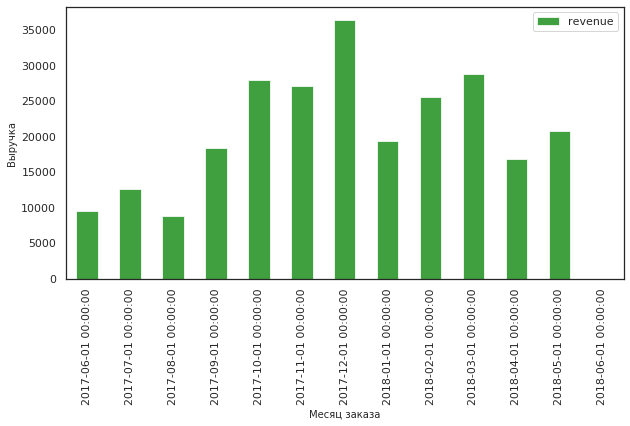

In [75]:
orders.plot(y='revenue',kind='bar',figsize=(10,5),color = 'green', alpha = 0.75,);
plt.ylabel('Выручка', fontsize=10);
plt.xlabel('Месяц заказа', fontsize=10);

*Какой средний чек?*

Чтобы найти средний чек всех покупателей, нужно сумму всех покупок разделить на их количество.

In [76]:
orders_log.head()

,buy_ts,revenue,uid,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01


In [77]:
mean_check = orders_log['revenue'].sum() / orders_log['revenue'].count()

In [78]:
mean_check

4.999646930477041

In [79]:
cohort_buy = orders_log.groupby('first_order_month').agg({'buy_ts':'nunique','uid':'nunique','revenue':'sum'})
cohort_buy.head()

,buy_ts,uid,revenue
first_order_month,,,
2017-06-01,4322,2023,24031.69
2017-07-01,2797,1923,16127.92
2017-08-01,2133,1370,11606.26
2017-09-01,3730,2581,34676.32
2017-10-01,5573,4340,27603.45


In [80]:
mean_check_1 = cohort_buy['revenue'].sum() / cohort_buy['buy_ts'].sum()

In [81]:
mean_check_1

5.332399669973955

*Сколько денег приносят? (LTV)*

Найдем LTV

In [82]:
first_orders = orders_log.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
cohort_sizes = first_orders.groupby('first_order_month')['uid'].nunique().reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [83]:
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [84]:
orders_new = orders_log.merge(first_orders, left_on=['uid', 'first_order_month'], 
                          right_on=['uid', 'first_order_month'], how='left')
cohorts_orders = orders_new.groupby(['first_order_month', 'order_month'])['revenue'].sum().reset_index()
cohorts_orders.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [85]:
report = pd.merge(cohorts_orders, cohort_sizes)
report.head()

,first_order_month,order_month,revenue,n_buyers
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023


In [86]:
report['age'] = ((report['order_month'] - report['first_order_month']) 
                     / np.timedelta64(1, 'M')).round().astype(int)
report['ltv'] = (report['revenue'] / report['n_buyers'])

result = report.pivot_table(index='first_order_month', columns='age', 
                                           values='ltv', aggfunc='sum').round(2)

In [87]:
result = result.query('first_order_month < "2018-01-01" ')

In [88]:
result

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,NaN
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,NaN,NaN
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,NaN,NaN,NaN
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,NaN,NaN,NaN,NaN
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.11,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,NaN,NaN,NaN,NaN,NaN,NaN


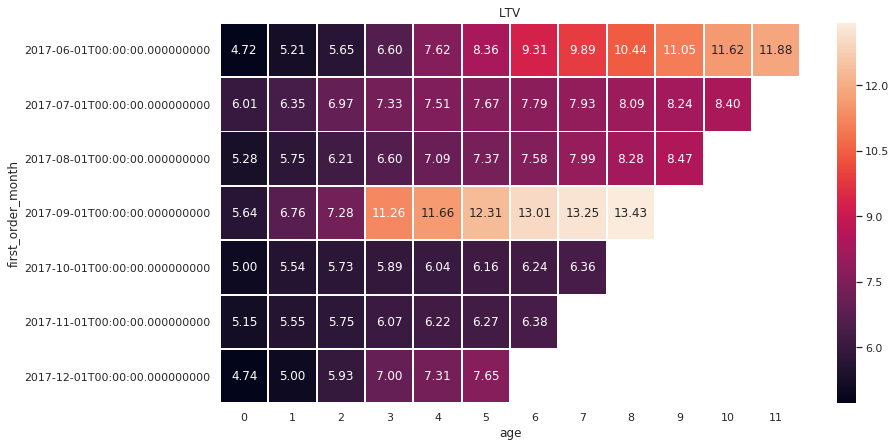

In [89]:
plt.figure(figsize=(13, 7))
plt.title('LTV')
sns.heatmap(result.cumsum(axis=1).round(2) , annot=True, fmt='.2f', 
            linewidths=1,)
plt.show()

Совокупная прибыль компании растет у каждой когорты, но с разной скоростью, быстрее всего – в сентябрьской.


-------
<div class="alert alert-block alert-success"> 

## Задание 4. Маркетинг.<a class="anchor" id="marketing"></a> 
</div>

-----
Маркетинг

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)
- Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

Сколько денег потратили? Всего / на каждый источник / по времени

In [90]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [91]:
orders_uid = orders['uid'].unique()

In [92]:
costs['purchase_date'] = costs['dt'].astype('datetime64[M]')

In [93]:
costs_grouped = costs.groupby(['purchase_date','source_id'])['costs'].agg({'costs':'sum'})

In [94]:
costs_grouped.head()

costs
purchase_date source_id         
2017-06-01    1          1125.61
              2          2427.38
              3          7731.65
              4          3514.80
              5          2616.12

Найдем сколько было потрачено всего.

In [95]:
int(costs_grouped['costs'].sum())

329131

Найдем сколько было потрачено на каждый источник.

In [96]:
costs_source = costs.groupby(['source_id'])['costs'].agg({'costs':'sum'})

In [97]:
costs_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


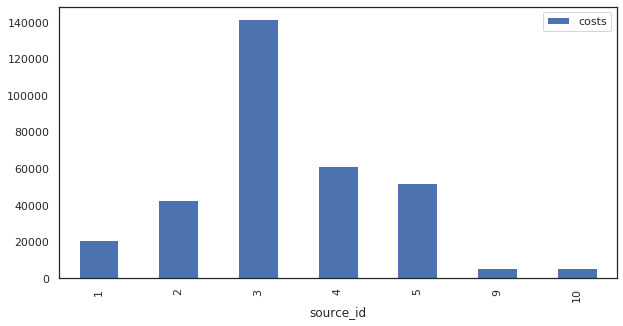

In [98]:
costs_source.plot(y='costs',kind='bar',figsize=(10,5),);

Больше всего средств тратится на источник 3, на втором месте источник 4

Больше всего денег было потрачено

In [99]:
costs_dt = costs.groupby(['purchase_date'])['costs'].agg({'costs':'sum'}).reset_index()

In [100]:
costs_dt['costs_month'] = costs_dt['purchase_date'].astype('datetime64[M]')

In [101]:
costs_dt

,purchase_date,costs,costs_month
0,2017-06-01,18015.00,2017-06-01
1,2017-07-01,18240.59,2017-07-01
2,2017-08-01,14790.54,2017-08-01
3,2017-09-01,24368.91,2017-09-01
4,2017-10-01,36322.88,2017-10-01
5,2017-11-01,37907.88,2017-11-01
6,2017-12-01,38315.35,2017-12-01
7,2018-01-01,33518.52,2018-01-01
8,2018-02-01,32723.03,2018-02-01
9,2018-03-01,30415.27,2018-03-01


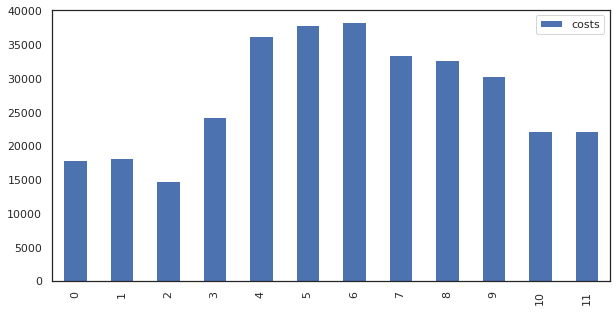

In [102]:
costs_dt.plot(y='costs',kind='bar',figsize=(10,5));

Больше всего средств на рекламу тратится в декабре и ноябре.

Сколько стоило привлечение одного покупателя из каждого источника?

In [103]:
visits_log.head()

,uid,device,end_ts,source_id,start_ts,start_date,start_week,start_month,start_year,long_ts
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20,51,12,2017,18.0
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19,8,2,2018,28.0
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,2017-07-01,26,7,2017,0.0
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2018-05-20,20,5,2018,24.0
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,2017-12-27,52,12,2017,0.0


In [104]:
users_source = visits_log.groupby(['source_id'])['uid'].agg({'uid':'nunique'})

In [105]:
users_source

,uid
source_id,
1,18999
2,26245
3,74756
4,83525
5,56974
6,6
7,34
9,9264
10,8067


In [106]:
costs_users = costs_source['costs'] / users_source['uid']

In [107]:
costs_users = costs_users.dropna()

In [108]:
costs_users

source_id
1     1.096546
2     1.631017
3     1.890439
4     0.731201
5     0.908434
9     0.595584
10    0.721766
dtype: float64

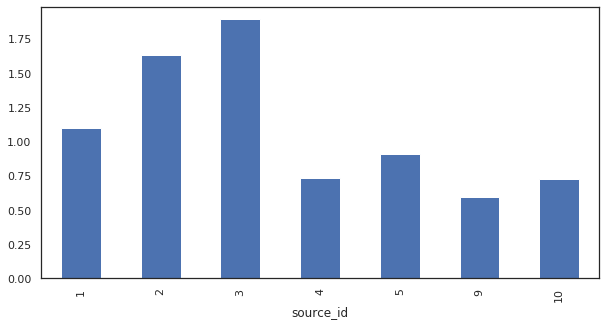

In [109]:
costs_users.plot(y='costs',kind='bar',figsize=(10,5));

3 и 2 источник тратят больше всего средств на привлечение одного уникального пользователя. Возможно стоит обратить внимание на источник 9, на него тратиться мало средств, а привличение пользоватей неплохое, а так же больше вкладывать средств в источник 4.

На сколько окупились расходы? (ROI)

In [110]:
report.head()

,first_order_month,order_month,revenue,n_buyers,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531


In [111]:
report_final = pd.merge(report, costs_dt, left_on='first_order_month', right_on='costs_month')
report_final['cac'] = report_final['costs'] / report_final['n_buyers']
report_final.head()

,first_order_month,order_month,revenue,n_buyers,age,ltv,purchase_date,costs,costs_month,cac
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,2017-06-01,18015.0,2017-06-01,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329,2017-06-01,18015.0,2017-06-01,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637,2017-06-01,18015.0,2017-06-01,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671,2017-06-01,18015.0,2017-06-01,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531,2017-06-01,18015.0,2017-06-01,8.905091


In [112]:
report_final['romi'] = report_final['ltv'] / report_final['cac']
report_final.head()

,first_order_month,order_month,revenue,n_buyers,age,ltv,purchase_date,costs,costs_month,cac,romi
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,2017-06-01,18015.0,2017-06-01,8.905091,0.530530
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329,2017-06-01,18015.0,2017-06-01,8.905091,0.054500
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637,2017-06-01,18015.0,2017-06-01,8.905091,0.049145
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671,2017-06-01,18015.0,2017-06-01,8.905091,0.107205
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531,2017-06-01,18015.0,2017-06-01,8.905091,0.114825


In [113]:
report_final_pivot = report_final.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

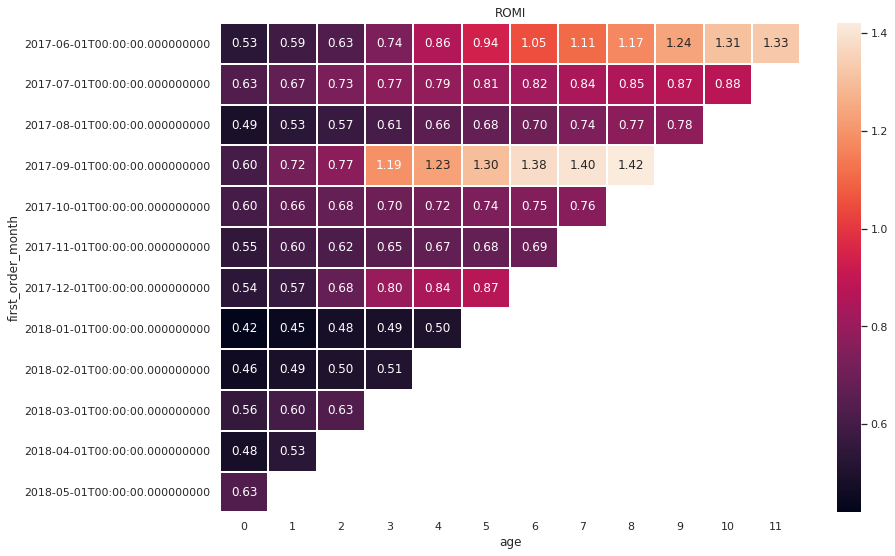

In [114]:
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(report_final_pivot
            .cumsum(axis=1).round(2), annot=True, fmt='.2f', 
            linewidths=1,)
plt.show()

На тепловой карте видно, что только 2 когорты смогли окупиться. Некоторые когорты достаточно близки к окупаемости, им нужно немного времени.

PS. По ошибке отправил сначала старую версию проекта)
С горем пополам, что-то получилось сделать) Запутался во всех столбцах, соединениях таблиц, группировках(

In [115]:
visits_log.head()

,uid,device,end_ts,source_id,start_ts,start_date,start_week,start_month,start_year,long_ts
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20,51,12,2017,18.0
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19,8,2,2018,28.0
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,2017-07-01,26,7,2017,0.0
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2018-05-20,20,5,2018,24.0
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,2017-12-27,52,12,2017,0.0


In [116]:
costs.head()

,source_id,dt,costs,purchase_date
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [117]:
orders_log.head()

,buy_ts,revenue,uid,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01


In [118]:
orders1=orders_log.set_index('uid')
orders1=orders1.rename(columns = {'buy_ts':'purchase_date'})
orders1.head()

,purchase_date,revenue,order_month,first_order_date,first_order_month
uid,,,,,
10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01,2017-06-01 00:10:00,2017-06-01
11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01,2017-06-01 00:25:00,2017-06-01
17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01,2017-06-01 00:27:00,2017-06-01
16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01,2017-06-01 00:29:00,2017-06-01
14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01,2017-06-01 07:58:00,2017-06-01


In [119]:
#строим профили пользователей
users = visits_log.groupby('uid').agg({'start_ts':'min'}).rename(columns= {'start_ts': 'purchase_dt'})
users = visits_log.set_index('uid').join(users)

In [120]:
users.head()

,device,end_ts,source_id,start_ts,start_date,start_week,start_month,start_year,long_ts,purchase_dt
uid,,,,,,,,,,
9223535092787691177,touch,2017-11-14 20:19:00,4,2017-11-14 20:00:00,2017-11-14,46,11,2017,19.0,2017-11-14 08:54:00
9223535092787691177,touch,2017-11-14 09:22:00,1,2017-11-14 08:54:00,2017-11-14,46,11,2017,28.0,2017-11-14 08:54:00
9223535092787691177,touch,2017-11-14 11:04:00,4,2017-11-14 10:30:00,2017-11-14,46,11,2017,34.0,2017-11-14 08:54:00
9223696655126052404,touch,2017-11-05 17:12:00,3,2017-11-05 17:08:00,2017-11-05,44,11,2017,4.0,2017-11-05 17:08:00
9223707061355654945,touch,2017-11-01 00:40:00,9,2017-10-31 22:36:00,2017-10-31,44,10,2017,124.0,2017-10-31 22:36:00


In [121]:
users= users.query('start_ts == purchase_dt')[['purchase_dt', 'device','source_id']]
users['purchase_date'] = users['purchase_dt'].dt.date
users['purchase_month'] = users['purchase_dt'].astype('datetime64[M]')

In [122]:
users= users.reset_index().set_index(['source_id','purchase_date']).join(costs.set_index(['source_id','purchase_date']), how = 'left')
users.head(3)

uid         purchase_dt   device  \
source_id purchase_date                                                     
1         2017-06-01     9714640286797951674 2017-06-01 21:45:00  desktop   
          2017-06-01     9714640286797951674 2017-06-01 21:45:00  desktop   
          2017-06-01     9714640286797951674 2017-06-01 21:45:00  desktop   

                        purchase_month         dt  costs  
source_id purchase_date                                   
1         2017-06-01        2017-06-01 2017-06-01  75.20  
          2017-06-01        2017-06-01 2017-06-02  62.25  
          2017-06-01        2017-06-01 2017-06-03  36.53

In [123]:
cac = (users.groupby(['source_id','purchase_date'])
       .agg({'device':'count', 'costs':'max'}).rename(columns = {'device':'users'}))
cac['purchase_cost'] = cac['costs'] / cac['users']

In [124]:
users = users.join(cac[['purchase_cost']], how = 'left').reset_index()
users = users.set_index('uid')[['purchase_dt','purchase_date','purchase_month','source_id','device','purchase_cost']]
users.head(3)

,purchase_dt,purchase_date,purchase_month,source_id,device,purchase_cost
uid,,,,,,
9714640286797951674,2017-06-01 21:45:00,2017-06-01,2017-06-01,1,desktop,0.055704
9714640286797951674,2017-06-01 21:45:00,2017-06-01,2017-06-01,1,desktop,0.055704
9714640286797951674,2017-06-01 21:45:00,2017-06-01,2017-06-01,1,desktop,0.055704


In [125]:
users_2 = users.query('purchase_dt < "2018-01-01"')
users_2.head()

,purchase_dt,purchase_date,purchase_month,source_id,device,purchase_cost
uid,,,,,,
9714640286797951674,2017-06-01 21:45:00,2017-06-01,2017-06-01,1,desktop,0.055704
9714640286797951674,2017-06-01 21:45:00,2017-06-01,2017-06-01,1,desktop,0.055704
9714640286797951674,2017-06-01 21:45:00,2017-06-01,2017-06-01,1,desktop,0.055704
9714640286797951674,2017-06-01 21:45:00,2017-06-01,2017-06-01,1,desktop,0.055704
9714640286797951674,2017-06-01 21:45:00,2017-06-01,2017-06-01,1,desktop,0.055704


In [126]:
orders2 = orders1.query('purchase_date < "2018-01-01"')

In [127]:
cohorts_source = (users_2.groupby('source_id')
                .agg({'device':'count', 'purchase_cost':'sum'})
                .rename(columns = {'device':'cohort_size'}))
cohorts_source['cac'] = cohorts_source['purchase_cost'] / cohorts_source['cohort_size']
cohorts_source

,cohort_size,purchase_cost,cac
source_id,,,
1,10604,798.27,0.075280
2,20528,1652.88,0.080518
3,72396,5989.85,0.082737
4,73537,3544.23,0.048197
5,58713,1967.90,0.033517
6,2,0.00,0.000000
7,22,0.00,0.000000
9,7233,194.24,0.026855
10,5643,250.68,0.044423


In [128]:
orders2 = orders2.drop(columns='first_order_date')
orders2 = orders2.drop(columns='first_order_month')
orders2.head()

,purchase_date,revenue,order_month
uid,,,
10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01
11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01
17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01
16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01
14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01


In [131]:
ltv_new = orders2.merge(users_2,on='uid')

In [132]:
ltv_new.head()

,purchase_date_x,revenue,order_month,purchase_dt,purchase_date_y,purchase_month,source_id,device,purchase_cost
uid,,,,,,,,,
10329302124590727494,2017-06-01 00:10:00,17.0,2017-06-01,2017-06-01 00:09:00,2017-06-01,2017-06-01,1,desktop,0.055704
10329302124590727494,2017-06-01 00:10:00,17.0,2017-06-01,2017-06-01 00:09:00,2017-06-01,2017-06-01,1,desktop,0.055704
10329302124590727494,2017-06-01 00:10:00,17.0,2017-06-01,2017-06-01 00:09:00,2017-06-01,2017-06-01,1,desktop,0.055704
10329302124590727494,2017-06-01 00:10:00,17.0,2017-06-01,2017-06-01 00:09:00,2017-06-01,2017-06-01,1,desktop,0.055704
10329302124590727494,2017-06-01 00:10:00,17.0,2017-06-01,2017-06-01 00:09:00,2017-06-01,2017-06-01,1,desktop,0.055704


In [133]:
ltv_new['age_month'] =((ltv_new['order_month'] - ltv_new['purchase_month']) / np.timedelta64(1,'M')).round().astype('int')
ltv_new = ltv_new.groupby(['source_id','age_month']).agg({'revenue':'sum'})
ltv_new = pd.pivot_table(ltv_new, index = 'source_id', columns ='age_month', values = 'revenue', aggfunc= 'mean')
ltv_new =ltv_new.cumsum(axis = 1)
ltv_new = cohorts_source[['cohort_size']].join(ltv_new)

In [135]:
ltv_new= ltv_new.div(ltv_new['cohort_size'], axis = 0).drop(columns= ['cohort_size'])
ltv_new.head()

,0,1,2,3,4,5,6
source_id,,,,,,,
1,2.135065,2.497161,2.865270,4.002432,4.540953,5.127479,5.520157
2,1.097215,1.467415,1.598692,2.315952,3.095163,3.272880,3.761125
3,0.612382,0.661582,0.709305,0.747407,0.766444,0.807146,0.824374
4,0.533486,0.585579,0.605285,0.667180,0.705783,0.724783,0.743493
5,0.710022,0.828087,0.892146,1.137768,1.363508,1.450255,1.558372


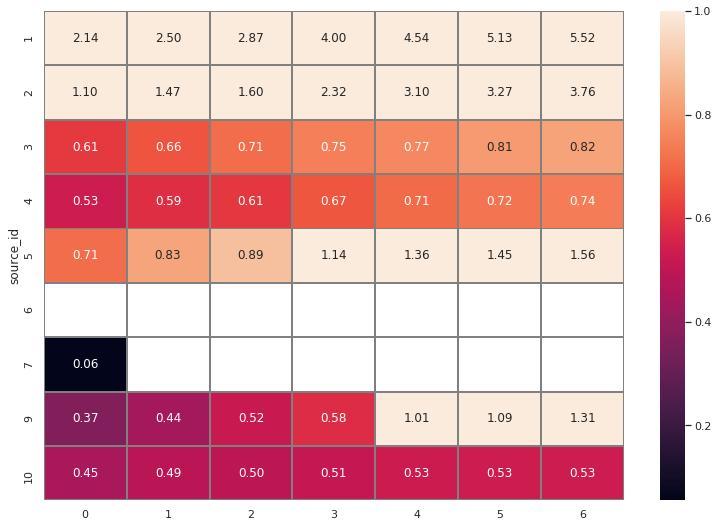

In [148]:
plt.figure(figsize = (13,9))
sns.heatmap(ltv_new, annot= True, fmt = '.2f', linewidths = 1, linecolor = 'gray', vmax = 1);

Быстрее всего окупились источники 1,2,5,9.
Больше всего финансирование у 3го источника, но как видно на тепловой карте, он не окупается за 6 месяцев.

-------
<div class="alert alert-block alert-success"> 

## Вывод.<a class="anchor" id="final"></a> 
</div>

-----


Продукт

Спрос на продукт зависит от сезона. Самый высокий спрос в холодное время года, возможносто стоит придумать специальные предложения, для остального времени, что бы постоянно привлекать пользователей на ресурс.

Продажи

Больше всего пользователей покупают в декабре. Пользователи проводят 1 минуту на сайте, нужно как-то исправить этот момент, и найти причину столь непродолжительного визита. Возможно их сразу просят зарегистрироваться, а это не всем нравится)

Маркетинг

Самым затратным оказался источник 3, но и клиентов он привёл больше. Остальные источники достаточно сильно отстают, маркетологам нужно пересмотреть целевую аудиторию и поменять рекламную кампанию.
Так же попробовать усилить рекламную кампанию в теплое время года.